Important: Our road matrix is different from the figure of numbers in the paper. In our code, the number represents the velocity after the car motion.

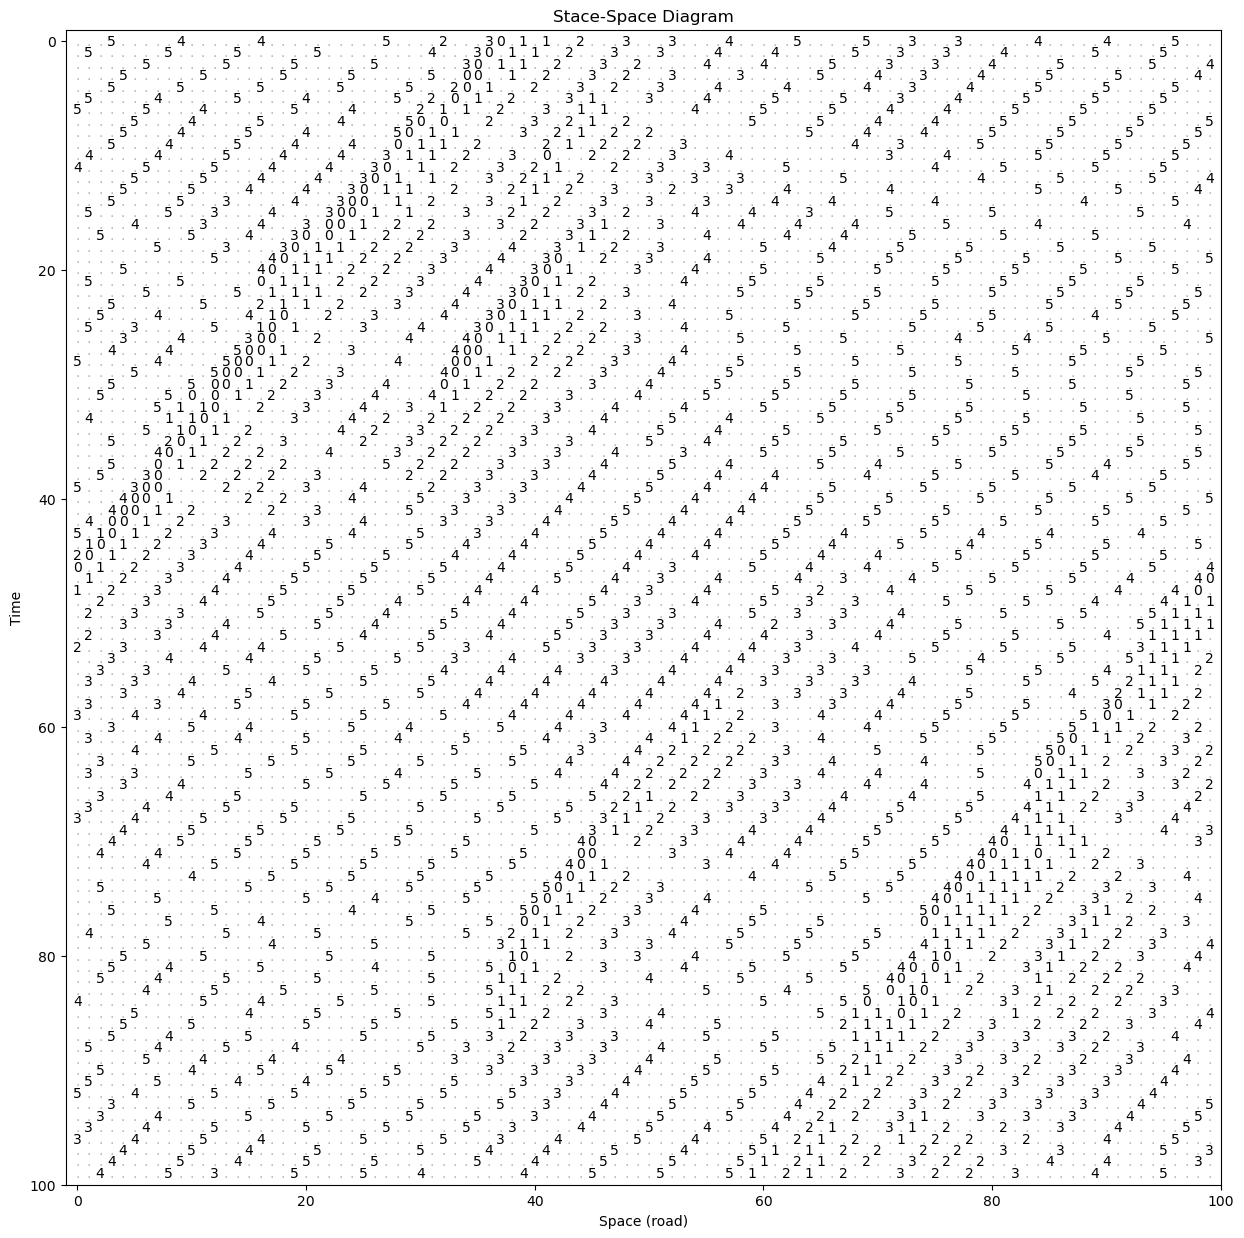

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# initialize the road, -1 for empty , 0 represent cars with 0 velocity
def initialize_road(length, num_cars):
    road = np.full(length, -1) 
    car_positions = np.random.choice(length, num_cars, replace=False)
    road[car_positions] = 0  
    return road

# calculate the distance between two cars inside loop
def get_distance_to_next_car_loop(road, pos):
    length = len(road)

    # check if the current position is valid
    if pos < 0 or pos >= length:
        raise ValueError("Current position is out of range")
    
    # check if there is a car at the current position
    if road[pos] == -1:
        raise ValueError("There is no car at the current position")
    
    distance = 1
    for i in range(1, length):
        next_pos = (pos + i) % length
        if road [next_pos] >= 0:
            return distance
        distance += 1

    return distance

# code for update traffic for each step
def update_traffic(road, vmax=5, p=0.3):
    length = len(road)
    new_road = np.full(length, -1)
    
    for i in range(length):
        if road[i] >= 0:  # If there's a car
            v = road[i]  # Current velocity
            
            # Step 1: Acceleration
            if v < vmax:
                v += 1
            
            # Step 2: Slowing down
            dist = get_distance_to_next_car_loop(road, i)
            v = min(v, dist - 1)
            
            # Step 3: Randomization
            if v > 0 and np.random.random() < p:
                v -= 1
            
            # Step 4: Car motion
            new_pos = (i + v) % length
            new_road[new_pos] = v
    return new_road

# code for calculating measurement(flow, density, avg_velocity)
def calculate_traffic_measurements(road):
    length = len(road)
   
    measure_point = length//2   
    cars = road[road >= 0]

    density = len(cars) / length
    avg_velocity = np.mean(cars) if len(cars) > 0 else 0
    flow = 0
    for end_pos in range(length):
        if road[end_pos] > 0:
            velocity = road[end_pos]
            start_pos = (end_pos - velocity) % length
            
            # Normal case
            if start_pos < end_pos:
                    if start_pos <= measure_point < end_pos:
                        flow += 1
            else:
                # cross boundary
                if start_pos <= measure_point or measure_point < end_pos:
                    flow += 1

    return flow, density, avg_velocity

# code running the simulation
def run_simulation(length, num_cars, t0, steps, vmax=5, p=0.1):
    road = initialize_road(length, num_cars)
    
    # first run the code t0 times, and begin the collection of data after the first t0 time steps
    for i in range(t0):
        road = update_traffic(road, vmax, p)

    flows = []
    densities = []
    velocities = []
    
    road_matrix = np.zeros((steps, length), dtype=int)
    road_matrix[0] = road

    for step in range(steps):
        flow, density, velocity = calculate_traffic_measurements(road)
        flows.append(flow)
        densities.append(density)
        velocities.append(velocity)
        
        road = update_traffic(road, vmax, p)
        if step < steps - 1:
            road_matrix[step + 1] = road


    return np.array(flows), np.array(densities), np.array(velocities), road_matrix

# code for space_time_diagram
def plot_space_time_diagram(road_matrix):
    steps, length = road_matrix.shape
    space_time_diagram = np.full((steps, length), '.', dtype = str)

    for i in range(steps):
        for j in range(length):
            if road_matrix[i,j] >= 0:
                space_time_diagram[i,j] = str(road_matrix[i,j])

    plt.figure(figsize=(15, 15))
    plt.imshow([[0]], cmap='binary')
   
    plt.xlim(-1, length)
    plt.ylim(steps, -1)
    for i in range(steps):
        for j in range(length):
            if space_time_diagram[i,j] != '.':
                plt.text(j, i, space_time_diagram[i,j], ha='center', va='center')
            else:
                plt.text(j, i, '.', ha='center', va='center', alpha=0.3, fontsize=10)

    plt.xlabel('Space (road)')
    plt.ylabel('Time')
    plt.title('Time-Space Diagram')


    plt.show()
    
    return space_time_diagram

flows, densities, velocities, road_matrix = run_simulation(100, 20, 1000, 100)
diagram = plot_space_time_diagram(road_matrix)